[Reference](https://towardsdatascience.com/19-examples-of-merging-plots-to-maximize-your-clustering-scatter-plot-87e8f1bb5fd2)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_pg = sns.load_dataset('penguins', cache=True, data_home=None)
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
df_pg.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
#select varibles for plotting
df_select = df_pg[['flipper_length_mm', 'bill_length_mm', 'species']]

#remove missing values
df_select.dropna(inplace=True)

#sclae the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_select.iloc[:,0:2]),
                      columns=['flipper', 'bill_length'])
df_std.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,flipper,bill_length
0,-1.418347,-0.884499
1,-1.062250,-0.811126
2,-0.421277,-0.664380
3,-0.563715,-1.324737
4,-0.777373,-0.847812


In [6]:
color_dict = {'Adelie':'#F65E5D',
              'Chinstrap':'#3AB4F2',
              'Gentoo':'#FFBC46'}

In [7]:
label_dict = {0:'Adelie', 1:'Chinstrap', 2:'Gentoo'}

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000).fit(df_std[['flipper',
                                                                        'bill_length']])
df_std['cluster'] = kmeans.labels_
df_std['species_'] = [label_dict.get(i) for i in df_std.cluster]
df_std

,flipper,bill_length,cluster,species_
0,-1.418347,-0.884499,0,Adelie
1,-1.062250,-0.811126,0,Adelie
2,-0.421277,-0.664380,0,Adelie
3,-0.563715,-1.324737,0,Adelie
4,-0.777373,-0.847812,0,Adelie
...,...,...,...,...
337,0.931890,0.601305,2,Gentoo
338,1.003109,0.527932,2,Gentoo
339,1.501644,1.188289,2,Gentoo
340,0.789451,0.234440,2,Gentoo


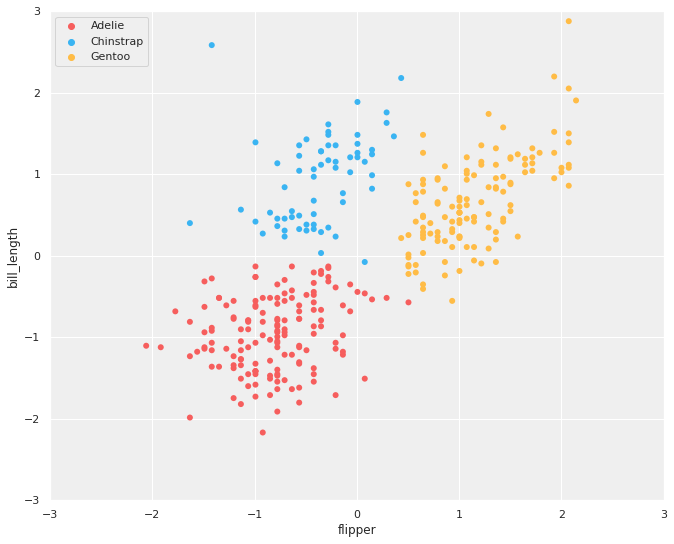

In [8]:
sns.set(rc={'axes.facecolor':'EFEFEF'})
ax = plt.figure(figsize=(11,9))
ax = sns.scatterplot(data=df_std, x = 'flipper', y ='bill_length',
                     hue='species_',
                     palette=color_dict,
                     s=36, linewidth=0)
plt.legend(loc='upper left')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.savefig('scatter.png')
plt.show()

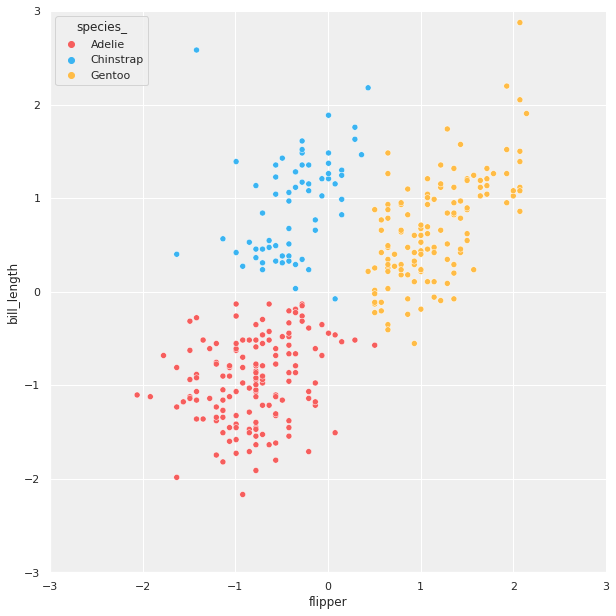

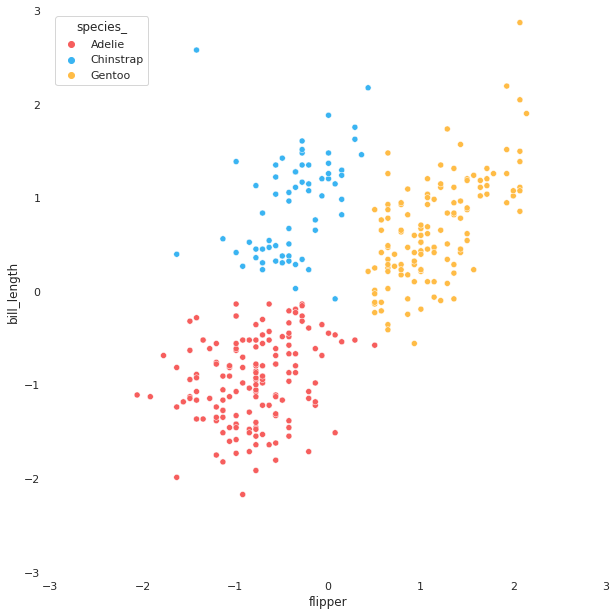

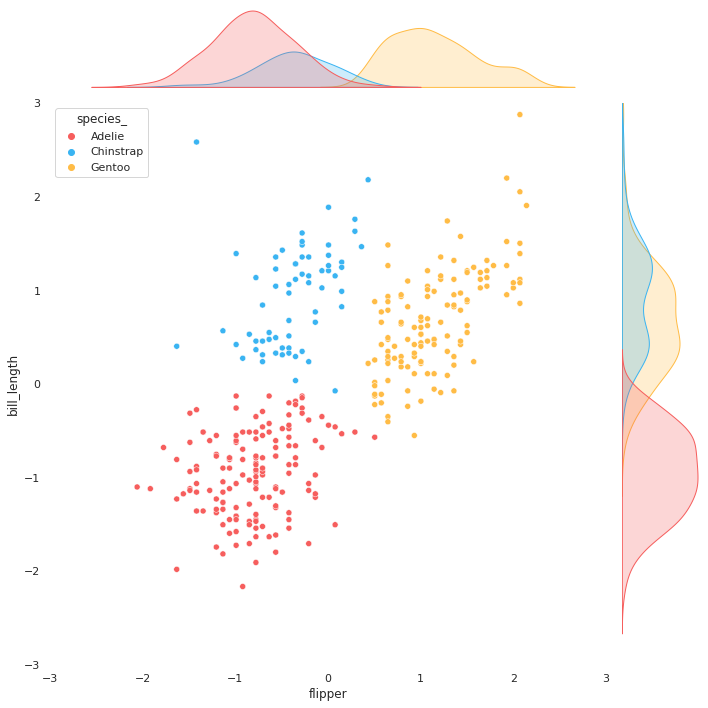

In [9]:
### normal scatter plot
sns.set(rc={'axes.facecolor':'EFEFEF'})
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_, palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
ax.ax_marg_x.remove()
ax.ax_marg_y.remove()
plt.savefig('scatter.png')
plt.show()

### scatter plot with transparent background
sns.set_style('white')
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_, palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
ax.ax_marg_x.remove()
ax.ax_marg_y.remove()
sns.despine(ax=None, left=True, bottom=True)
plt.savefig('scatter_tr.png', transparent=True)
plt.show()

### scatter plot with marginal axes
sns.set_style('white')
sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_, palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
ax = sns.despine(ax=None, left=True, bottom=True)
plt.savefig('j_scatter_tr.png', transparent=True)
plt.show()

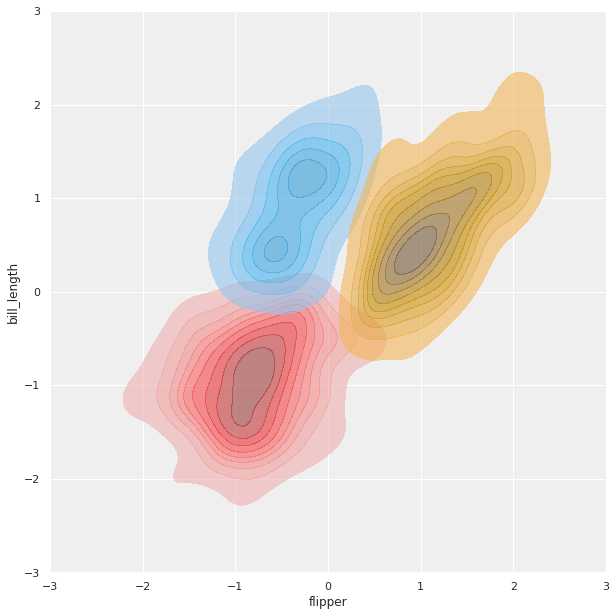

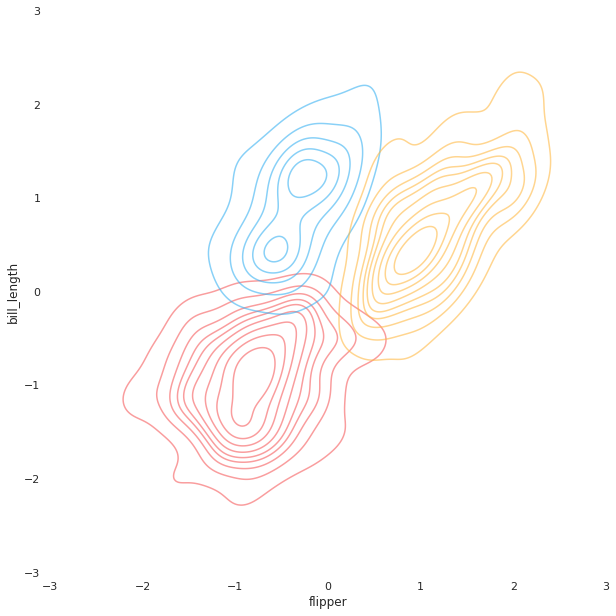

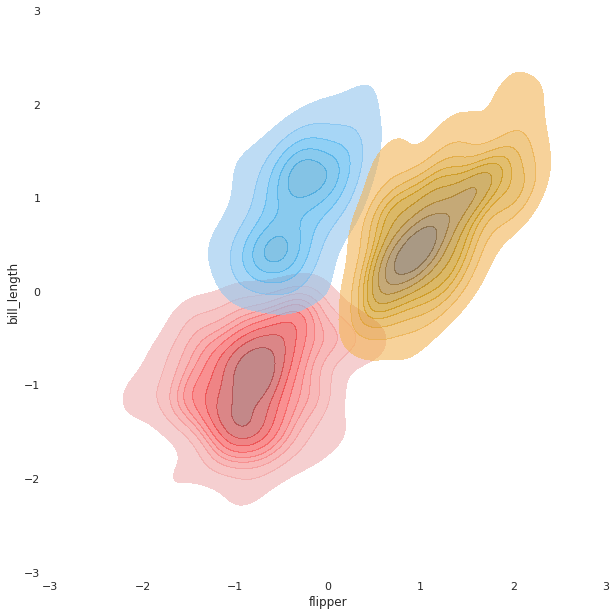

In [10]:
#create color list set a different tone of color from the data points 
color_dict_bg = {'Adelie':'#F65C5D', 'Chinstrap':'#3AB2F2', 'Gentoo':'#FFBA46'}

### kde plot
sns.set(rc={'axes.facecolor':'EFEFEF'})
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              cut = 2, hue=df_std.species_,
              palette=color_dict_bg,
              xlim=[-3,3], ylim=[-3,3],
              kind='kde', fill=True,
              height=10, ratio=6,
              joint_kws = dict(alpha=0.6),
              marginal_kws=dict(fill=True),
              legend=False)
ax.ax_marg_x.remove()
ax.ax_marg_y.remove()
plt.savefig('kde.png')
plt.show()

### kde plot only lines with transparent background
sns.set_style('white')
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              cut = 2, hue=df_std.species_,
              palette=color_dict_bg,
              xlim=[-3,3], ylim=[-3,3],
              kind='kde', fill=False,
              height=10, ratio=6,
              joint_kws = dict(alpha=0.6),
              marginal_kws=dict(fill=True),
              legend=False)
ax.ax_marg_x.remove()
ax.ax_marg_y.remove()
ax = sns.despine(ax=None, left=True, bottom=True, offset=None, trim=False)
plt.savefig('kde_tr.png', transparent=True)
plt.show()

### kde plot filled with colors with transparent background
sns.set_style('white')
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              cut = 2, hue=df_std.species_,
              palette=color_dict_bg,
              xlim=[-3,3], ylim=[-3,3],
              kind='kde', fill=True,
              height=10, ratio=6,
              joint_kws = dict(alpha=0.6),
              marginal_kws=dict(fill=True),
              legend=False)
ax.ax_marg_x.remove()
ax.ax_marg_y.remove()
ax = sns.despine(ax=None, left=True, bottom=True)
plt.savefig('kde_tr_fill.png', transparent=True)
plt.show()

<Figure size 792x648 with 0 Axes>

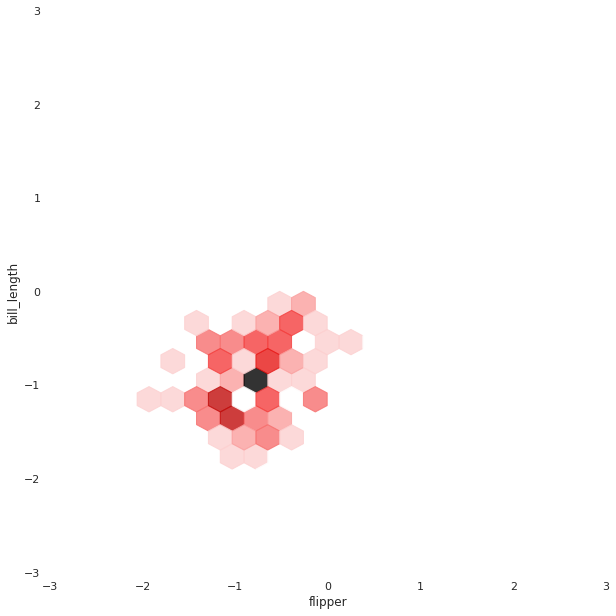

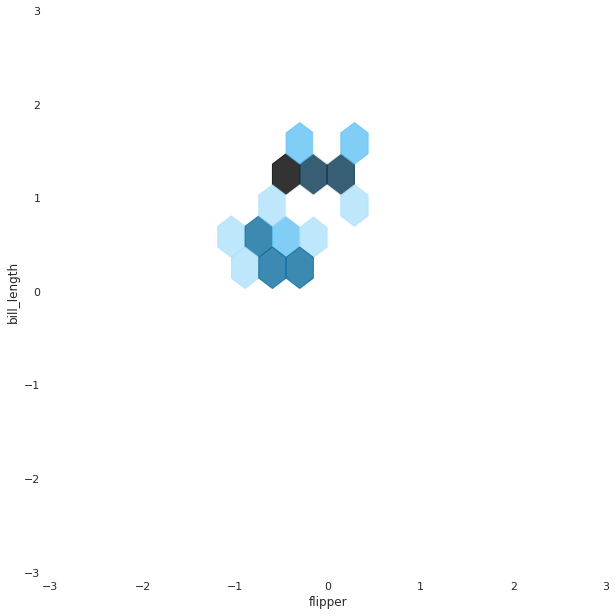

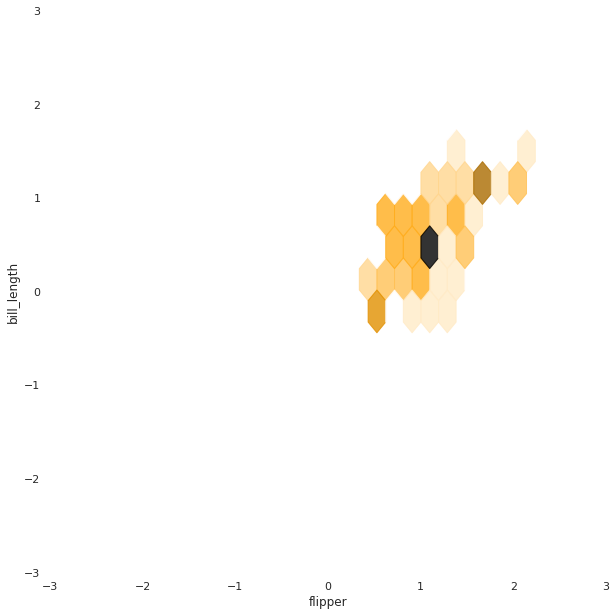

<Figure size 792x648 with 0 Axes>

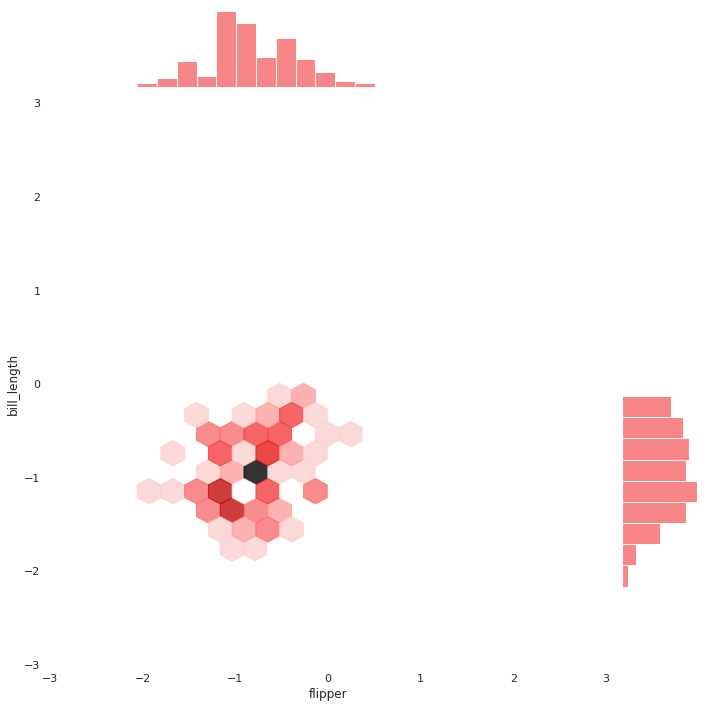

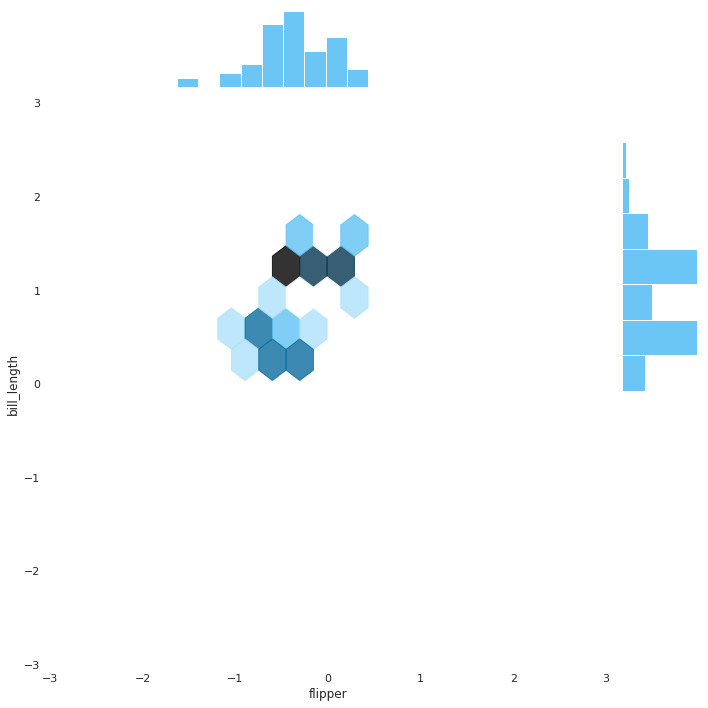

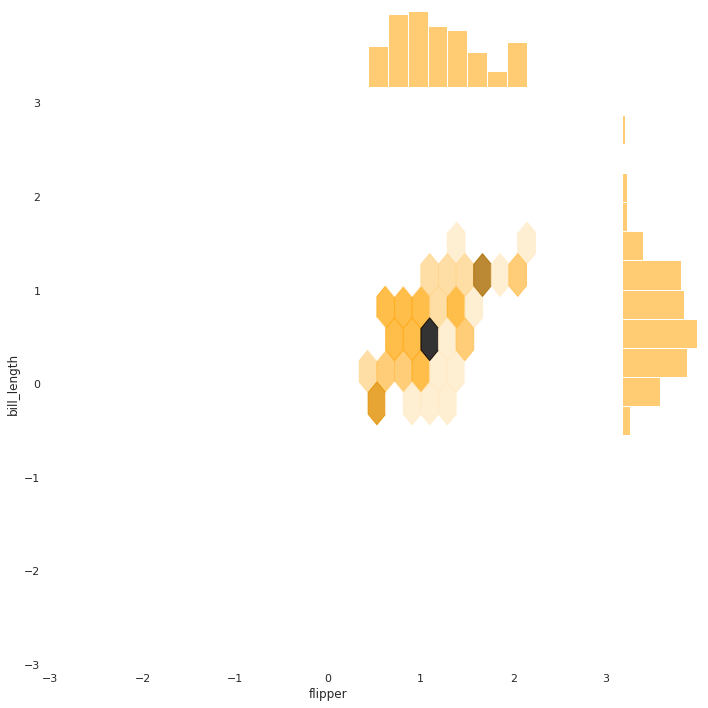

In [11]:
list_penguins = ['Adelie', 'Chinstrap', 'Gentoo']
from PIL import Image

### without marginal axes
save_name = []
sns.set_style('white')
ax = plt.figure(figsize=(11,9))
for i in list_penguins:
    df = df_std[df_std.species_==i]
    ax = sns.jointplot(x=df.flipper, y=df.bill_length,
                       alpha=0.8, color=color_dict.get(i),
                       mincnt=1,
                       kind='hex', height=10, ratio=6,
                       xlim=[-3,3], ylim=[-3,3]
                      )
    ax.ax_marg_x.remove()
    ax.ax_marg_y.remove()
    ax = sns.despine(ax=None, left=True, bottom=True)
    s_name = 'hex_' + i +'.png'
    save_name.append(s_name)
    plt.savefig(s_name, transparent=True)
    plt.show()

#read all the plots, merge and save the result 
h1 = Image.open(save_name[0])
h2 = Image.open(save_name[1])
h3 = Image.open(save_name[2])

h1.paste(h2, (0, 0), h2)
h1.paste(h3, (0, 0), h3)
h1.save('hex_tr.png')

### with marginal axes
save_name_m = []
sns.set_style('white')
ax = plt.figure(figsize=(11,9))
for i in list_penguins:
    df = df_std[df_std.species_==i]
    ax = sns.jointplot(x=df.flipper, y=df.bill_length,
                       alpha=0.8, color=color_dict.get(i),
                       mincnt=1,
                       kind='hex', height=10, ratio=6,
                       xlim=[-3,3], ylim=[-3,3]
                      )
    ax = sns.despine(ax=None, left=True, bottom=True)
    s_name = 'hex_' + i +'.png'
    save_name_m.append(s_name)
    plt.savefig(s_name, transparent=True)
    plt.show()

#read all the plots, merge and save the result 
h1m = Image.open(save_name_m[0])
h2m = Image.open(save_name_m[1])
h3m = Image.open(save_name_m[2])

h1m.paste(h2m, (0, 0), h2m)
h1m.paste(h3m, (0, 0), h3m)
h1m.save('j_hex_tr.png')

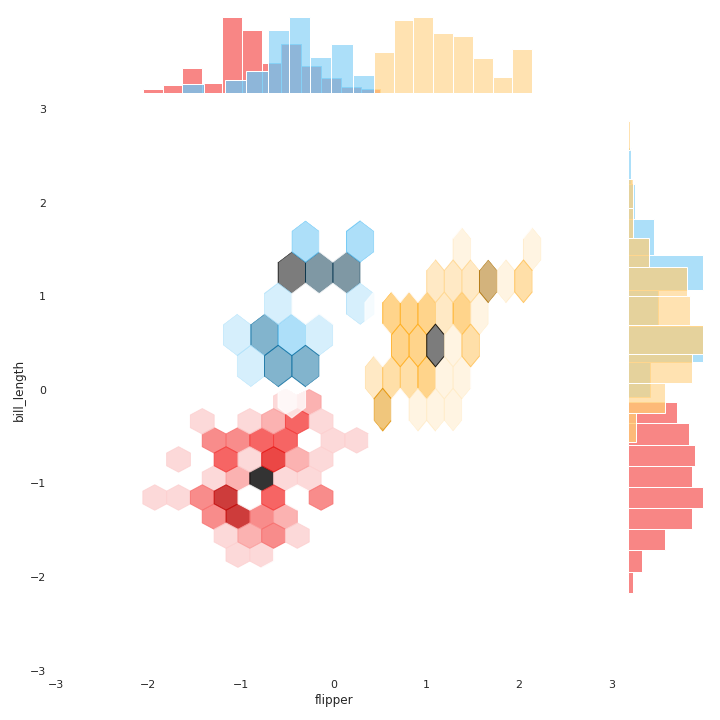

In [12]:
Image.open('hex_tr.png')
Image.open('j_hex_tr.png')

In [14]:
x_avg = df_std['flipper'].mean()
y_avg = df_std['bill_length'].mean()
centroids = [list(i) for i in list(kmeans.cluster_centers_)]
centroids

[[-0.8085020383937745, -0.9582361857580423],
 [-0.37008778973321976, 0.938075318440887],
 [1.1477907585857148, 0.6665893202302959]]

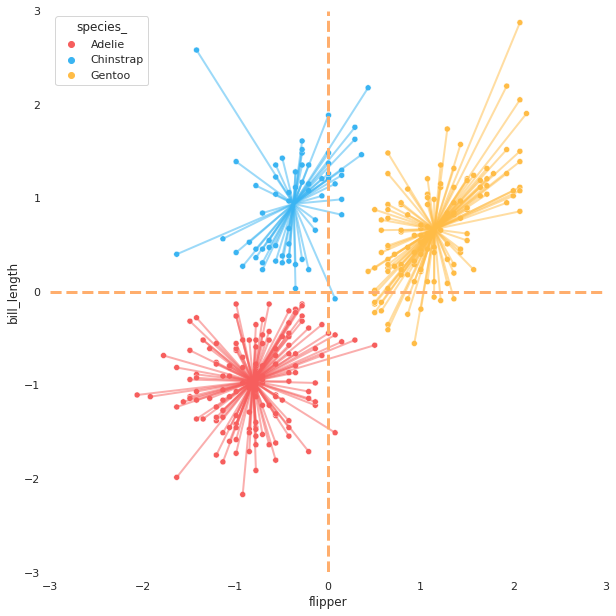

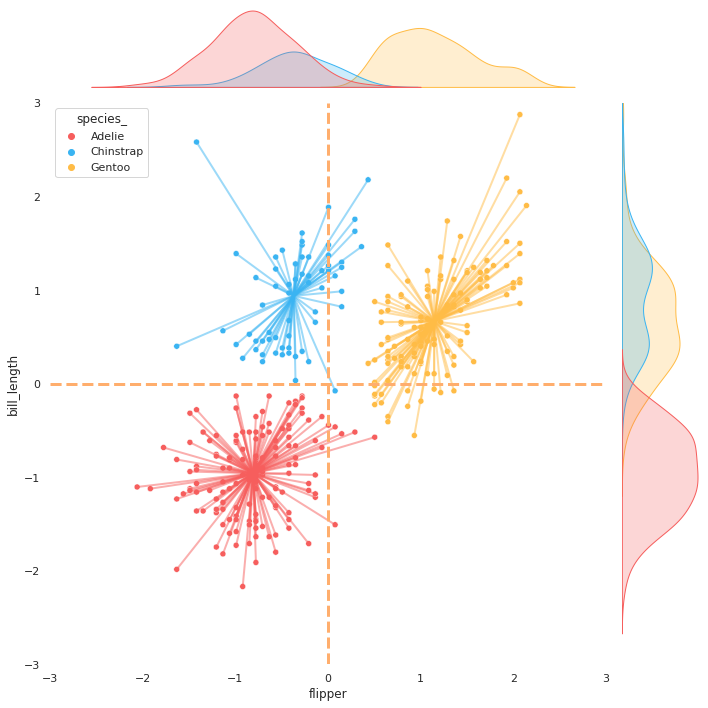

In [15]:
list_penguins = ['Adelie', 'Chinstrap', 'Gentoo']

###with marginal axes
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_,
              palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
for i,p in zip(centroids,list_penguins):
    df = df_std[df_std.species_==p]
    for pc1, pc2 in zip(df.flipper, df.bill_length):
        color = color_dict.get(p)
        ax.ax_joint.plot([i[0],pc1],[i[1],pc2], lw=2,
                         color=color, alpha=0.5,
                        )
#add avagare line
ax.ax_joint.axvline(x=x_avg, lw=3, c='#FFAE6D', ls='--')
ax.ax_joint.axhline(y=y_avg, lw=3, c='#FFAE6D', ls='--')
#remove marginal axes
ax.ax_marg_x.remove()
ax.ax_marg_y.remove()
ax = sns.despine(ax=None, top=True, right=True, left=True,
                 bottom=True, offset=None, trim=False)

plt.savefig('line_tr.png', transparent=True)
plt.show()

####with marginal axes
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_,
              palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
for i,p in zip(centroids,list_penguins):
    df = df_std[df_std.species_==p]
    for pc1, pc2 in zip(df.flipper, df.bill_length):
        color = color_dict.get(p)
        ax.ax_joint.plot([i[0],pc1],[i[1],pc2], lw=2,
                         color=color, alpha=0.5,
                        )
#add avagare line
ax.ax_joint.axvline(x=x_avg, lw=3, c='#FFAE6D', ls='--')
ax.ax_joint.axhline(y=y_avg, lw=3, c='#FFAE6D', ls='--')
ax = sns.despine(ax=None, left=True, bottom=True)

plt.savefig('j_line_tr.png', transparent=True)
plt.show()

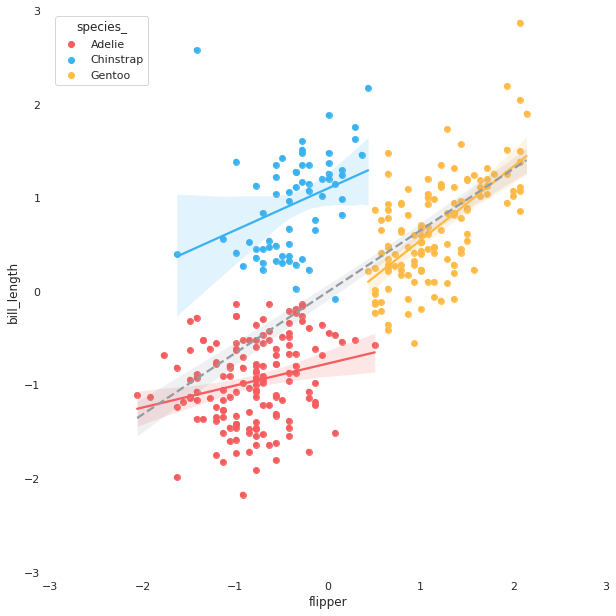

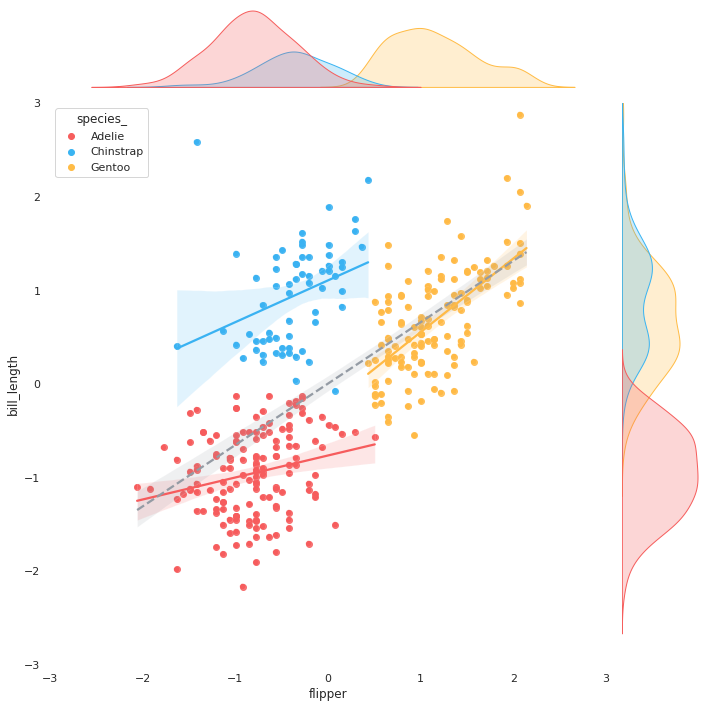

In [16]:
####without marginal axes
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_, palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
for p in list_penguins:
    df = df_std[df_std.species_==p]
    sns.regplot(x=df.flipper, y=df.bill_length,
                color=color_dict_bg.get(p), ax=ax.ax_joint)

ax.ax_marg_x.remove()
ax.ax_marg_y.remove()

ax = sns.regplot(x=df_std.flipper, y=df_std.bill_length,
                 color='#949ba4', ax=ax.ax_joint, scatter=False, line_kws={'linestyle': '--'})

sns.despine(ax=None, top=True, right=True, left=True,
                 bottom=True, offset=None, trim=False)
plt.savefig('reg_tr.png', transparent=True)
plt.show()

####with marginal axes
ax = sns.jointplot(x=df_std.flipper, y=df_std.bill_length,
              hue=df_std.species_, palette=color_dict,
              xlim=[-3,3], ylim=[-3,3], lw=0,
              height=10, ratio=6
             )
for p in list_penguins:
    df = df_std[df_std.species_==p]
    sns.regplot(x=df.flipper, y=df.bill_length,
                color=color_dict_bg.get(p), ax=ax.ax_joint)
    
sns.regplot(x=df_std.flipper, y=df_std.bill_length,
            color='#949ba4', ax=ax.ax_joint, scatter=False, line_kws={'linestyle': '--'})
ax = sns.despine(ax=None, top=True, right=True, left=True,
                 bottom=True, offset=None, trim=False)
plt.savefig('j_reg.png', transparent=True)
plt.show()

In [17]:
def merge_plot(background, layer_list):
    from PIL import Image
    bg = Image.open(background)
    #merge the layers
    for i in layer_list:
        layer = Image.open(i)
        bg.paste(layer, (0, 0), layer)
    return bg

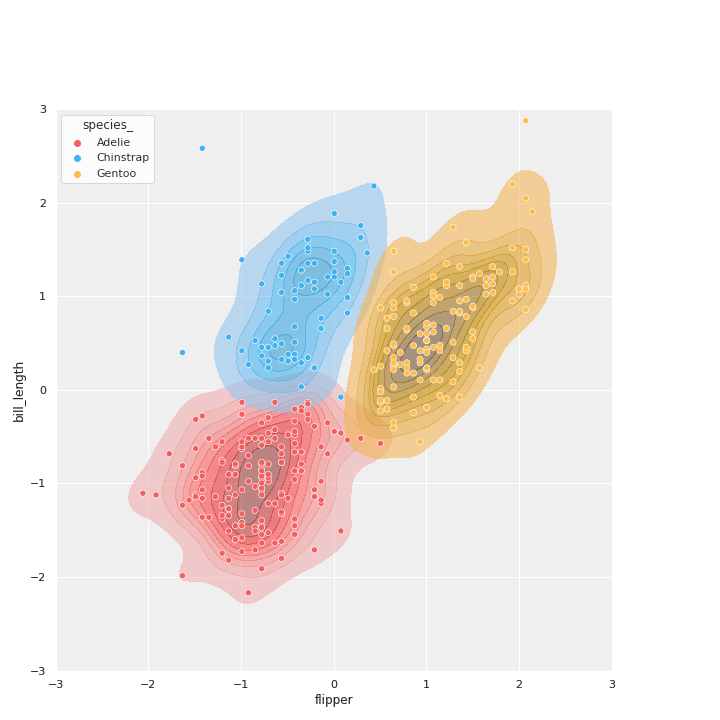

In [19]:
background = 'kde.png'
layer_list = ['scatter_tr.png']
merge_plot(background, layer_list)

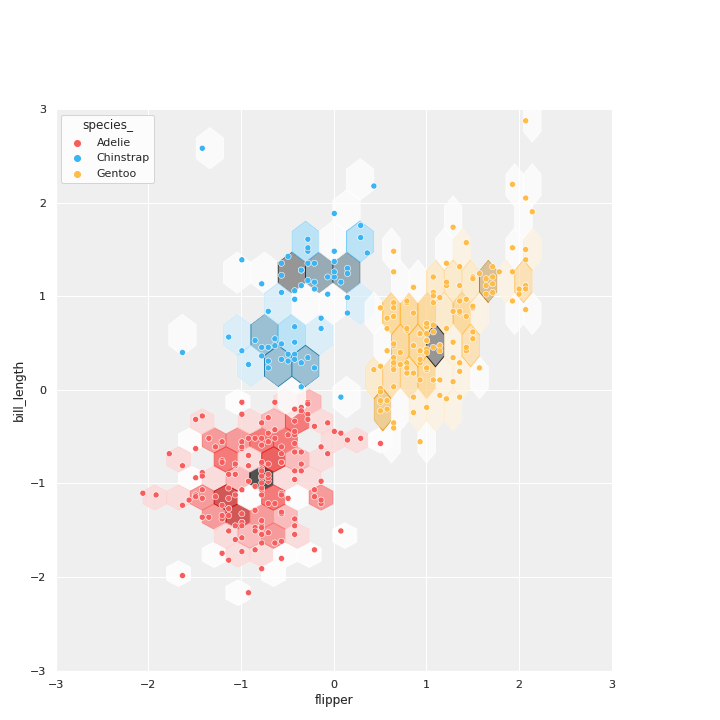

In [20]:
background = 'scatter.png'
layer_list = ['hex_tr.png', 'scatter_tr.png']
merge_plot(background, layer_list)

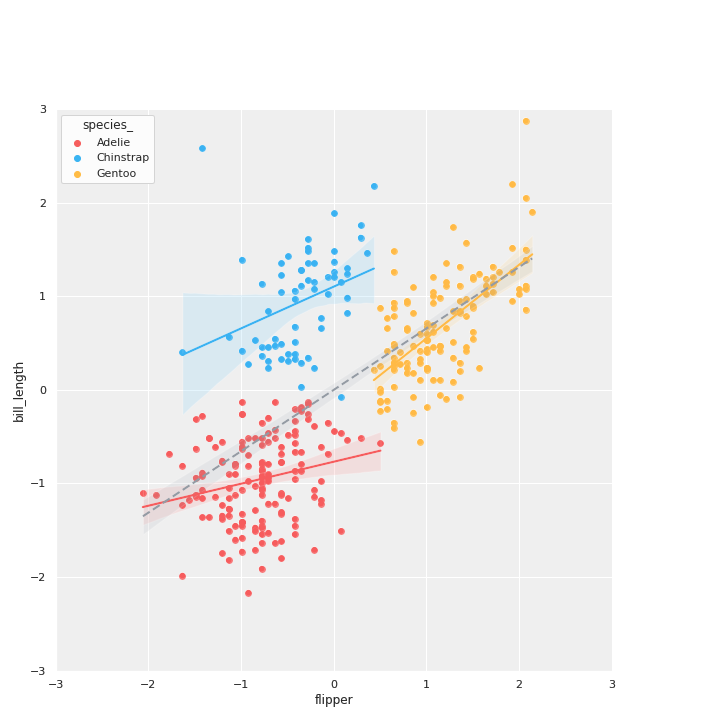

In [21]:
background = 'scatter.png'
layer_list = ['reg_tr.png']
merge_plot(background, layer_list)

In [23]:
# background = 'j_scatter.png'
# layer_list = ['kde_tr_fill.png', 'scatter_tr.png']
# merge_plot(background, layer_list)